<a href="https://colab.research.google.com/github/xxxcrttt/SPS/blob/main/sps_lecture1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 1 
## Supervised Learning: Classification and Regression 

```
x :: Image, y :: Int         # Object recognition 
x :: Image, y :: Matrix{Int} # Image segmentation 
x :: Audio, y :: Str         # Speech recognition 
x :: Str,   y :: Audio       # Text-to-speech
```
Goal:   
learn something about the mapping from input $x$ to output $y$. $(x, y)$ pairs as data. 

Approach:   
learn a function that maps from $x$ to a guess about the corresponding $y$. The guess is $\hat{y}$.

We try to make $y$ from the data as similar as possible to the estimates $\hat{y}$. 

\begin{align}
  f(x) \rightarrow \hat{y}
\end{align}

One common example of measure the "similarity" is **squared error()**, but this makes learning difficult for discrete object -- can't diferentiate. 

\begin{align}
  \text{SE} &= ({y - \hat{y}})^2
\end{align}

Another way:   
write a function that takes $x$ and returns a distribution over $y$. We can always mazimise the probability of the $y$. 

\begin{align}
  f(x) \rightarrow P(y| x)
\end{align}


**NOTE**: 
Classification(分类) and Regression(回归) are special types of supervised learning. 
* Classification: the output is a class-label: 
```
Y = Int # classification 
```
* Regression: the output is one/many real values: 
```
Y = Float # regression
```
* If the output is more complicated -- string, image or audio, then its neither regression or classification, its just supervised learning. 












### Multivariate linear regression (多元线性回归)

The input for the $λ$th data point $x$ is a vector, and the corresponding output $yλ$ is also a vector(multi-output case).   

We assume that $yλ$ is Gaussian, conditioned on x (高斯分布): 

\begin{align}
  P(y_\lambda| x_\lambda, w) &= N(y_\lambda; x_\lambda \cdot w, \sigma^2).
\end{align}

Multivariate Gaussian over all outputs $y$ jointly: 

\begin{align}
  P(y| X, w) &= N(y; X w, \sigma^2 I)
\end{align}

Writing the log-probability out in full: 

\begin{align}
  L(w) &= \log P(y| X, w) = \sum_{\lambda} [{ -\tfrac{1}{2} \log 2 \pi \sigma^2 - \tfrac{1}{2 \sigma^2} ({Y_(λ) - \sum_i X_(λ i) w_i})^2}].
\end{align}

The maximum likelihood estimate $\hat{w}$: 

\begin{align}
  \hat{w} &= \argmax_{\w} L(w)
\end{align}


\dfrac{\partial f}{\partial x}

Take the gradient: 
\begin{align}
  \dfrac{\partial L(w)}{\partial {w_\alpha}} &= - \frac{1}{2 \sigma^2} \dfrac {\partial}{∂{w_\alpha}} \sum_\lambda (y_\lambda - \sum_i X_{\lambda i} w_i)^2.
\end{align}

Chaine Rule: 

\begin{align}
  \dfrac{∂ L(w)}{∂{w_\alpha}} &= - \frac{1}{\sigma^2} \sum_{\lambda} ({y_\lambda - \sum_i X_{\lambda i} w_i})\dfrac{∂}{∂{w_\alpha}} ({y_\lambda - \sum_i X_{\lambda i} w_i}).
\end{align}

Interlude: the **Kronecker delta** -- looks like matrix: 

\begin{align}
  \dfrac{\mathrm{d}[w_i]}{\mathrm{d}{w_\alpha}} = \delta_{i \alpha}\\
  \delta_{i\alpha} = \begin{cases}
    1 & \text{ if } i = \alpha\\
    0 & \text{ if } i \neq \alpha
  \end{cases}
\end{align}

back to vector / matrix notation: 

\begin{align}
  \dfrac {∂ L(w)}{∂ w} &= \tfrac{1}{\sigma^2} X^T(y - X w)
\end{align}

At the top of the hill, the gradient is zero： 

\begin{align}
  0 &= \at{\dfrac{∂ L(w)}{∂(w)}}_{\w=\wh}\\ 
  0 &= \tfrac{1}{\sigma^2} X^T (y - X \hat(w)\\
  0 &= X^T y - X^T X \hat(w) \\
  X^T X \hat(w) &= X^T y 
\end{align}

As $X^T X$ is squared, it can be inversed:

\begin{align}
  \hat(w)  &= ({X^T X}^{-1}) X^T y 
\end{align}


In [ ]:
import numpy as np
import torch as t 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# %matplotlib widget
from ipywidgets import FloatSlider, interact, interact_manual

In [ ]:
def fit_wh(X, Y):
  return t.inverse(X.T @ X) @X.T @ Y

Generate some 1D 'fake' data.

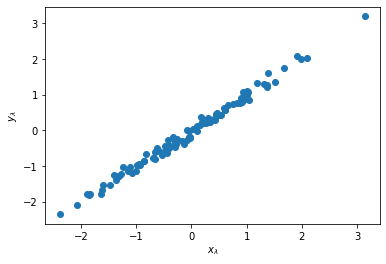

In [ ]:
N     = 100 # number of points
D     = 1   # dimension 
sigma = 0.1 # output noise 
X     = t.randn(N, D)
Wtrue = t.ones(D, 1)
Y     = X @ Wtrue + sigma*t.randn(N,1)

fig, ax = plt.subplots()
ax.set_xlabel("$x_\lambda$")
ax.set_ylabel("$y_\lambda$")
ax.scatter(X,Y);

In [ ]:
Wh = fit_wh(X, Y)
print(f"Wtrue = {Wtrue.T}")
print(f"Wh    = {Wh.T}")

Wtrue = tensor([[1.]])
Wh    = tensor([[0.9951]])


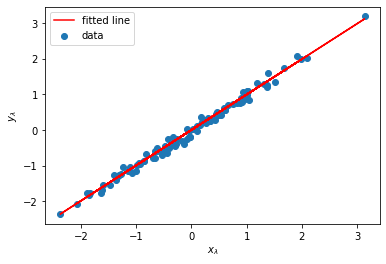

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel("$x_\lambda$")
ax.set_ylabel("$y_\lambda$")
ax.scatter(X, Y, label="data")
ax.plot(X, X@Wh, 'r', label="fitted line")
ax.legend();

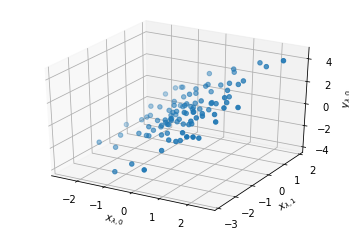

In [ ]:
# 2D data 
N     = 100 
D     = 2
sigma = 0.3 
X     = t.randn(N, D)
Wtrue = t.ones(D, 1)
Y     = X @ Wtrue + sigma*t.randn(N, 1)

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.set_xlabel("$x_{\lambda, 0}$")
ax.set_ylabel("$x_{\lambda, 1}$")
ax.set_zlabel("$y_{\lambda, 0}$")
ax.scatter(xs=X[:,0], ys=X[:,1],zs=Y[:,0]);

In [ ]:
Wh = fit_wh(X, Y)
print(f"Wtrue = {Wtrue.T}")
print(f"Wh    = {Wh.T}")

Wtrue = tensor([[1., 1.]])
Wh    = tensor([[1.0016, 1.0309]])


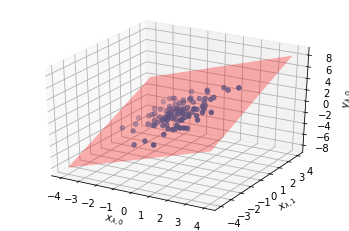

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("$x_{\lambda, 0}$")
ax.set_ylabel("$x_{\lambda, 1}$")
ax.set_zlabel("$y_{\lambda, 0}$")
ax.scatter(X[:, 0], X[:, 1], Y[:, 0])

Xp = t.tensor([
               [-4., -4.],
               [-4.,  4.],
               [ 4., -4.],
               [ 4.,  4.]
])

ax.plot_trisurf(
    np.array(Xp[:, 0]),
    np.array(Xp[:, 1]),
    np.array((Xp @ Wh)[:, 0]),
    color = 'r',
    alpha = 0.3
)

Wtrue = tensor([[2.]])
Wh    = tensor([[6.6143]])


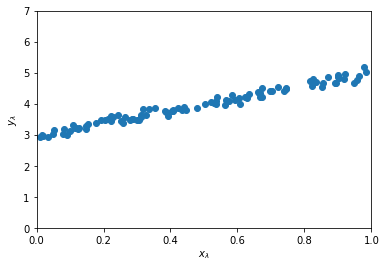

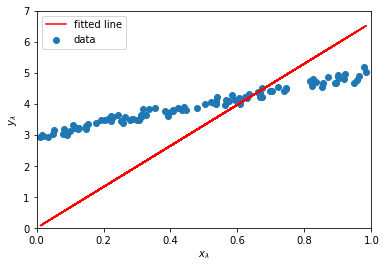

In [ ]:
# fit old model, without a bias, it doesn't work 
N     = 100 # number of datapoints
D     = 1   # dimension of datapoints
sigma = 0.1 # output noise
X     = t.rand(N, D)
Wtrue = 2*t.ones(D, 1)
btrue = 3
Y     = X @ Wtrue + btrue + sigma*t.randn(N, 1)

fig, ax = plt.subplots()
ax.set_xlabel("$x_\lambda$")
ax.set_ylabel("$y_\lambda$")
ax.set_xlim(0, 1)
ax.set_ylim(0, 7)
ax.scatter(X, Y);

Wh = fit_wh(X, Y)
print(f"Wtrue = {Wtrue.T}")
print(f"Wh    = {Wh.T}")

fig, ax = plt.subplots()
ax.set_xlabel("$x_\lambda$")
ax.set_ylabel("$y_\lambda$")
ax.set_xlim(0, 1)
ax.set_ylim(0, 7)
ax.scatter(X, Y, label="data")
ax.plot(X, X@Wh, 'r', label="fitted line")
ax.legend();

Expand the 1D feature vector into a 2D feature vector, with the second feature being just biases. 

\begin{align}
  P(y_\lambda| x_\lambda, w, b) &= N({y_\lambda; \underbrace{\begin{pmatrix} x_\lambda & 1 \end{pmatrix}}_\text{expanded feature vector} \overbrace{\begin{pmatrix} w \\ b \end{pmatrix}}^\text{expanded weight vector}, \sigma^2}).
\end{align}



In [ ]:
def add_bias(X):
  return t.cat([X, t.ones(X.shape[0], 1)], 1)

Xe = add_bias(X)
Xe[:10, :]            

tensor([[0.6063, 1.0000],
        [0.6979, 1.0000],
        [0.5202, 1.0000],
        [0.0330, 1.0000],
        [0.3047, 1.0000],
        [0.0918, 1.0000],
        [0.8170, 1.0000],
        [0.2864, 1.0000],
        [0.6286, 1.0000],
        [0.8947, 1.0000]])

In [ ]:
Wh = fit_wh(Xe, Y)
print(f"Wh    = {Wh.T}")
print(f"Wtrue = {Wtrue}")
print(f"btrue = {btrue}")

Wh    = tensor([[2.0282, 2.9724]])
Wtrue = tensor([[2.]])
btrue = 3


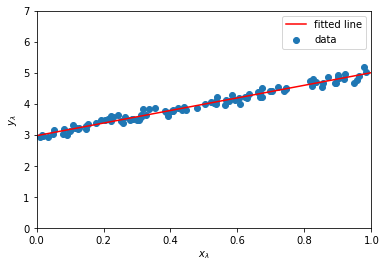

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel("$x_\lambda$")
ax.set_ylabel("$y_\lambda$")
ax.set_xlim(0, 1)
ax.set_ylim(0, 7)
ax.scatter(X, Y, label="data")

xs = t.tensor([[0.],[1.]])
ax.plot(xs, add_bias(xs)@Wh,'r', label="fitted line")
ax.legend();

In particular, instead of just incorporating a constant feature, we can incorparate arbitrary, nonlinear functions of the original input data. 

可以结合原始数据的任意非线性函数，而不仅仅是一个常数特征。

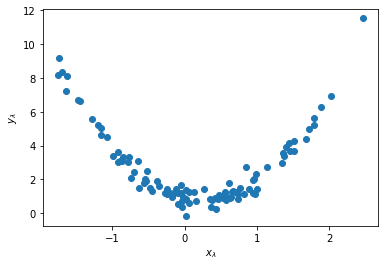

In [ ]:
N     = 100 # number of datapoints
D     = 1   # dimension of datapoints
sigma = 0.5 # output noise
X     = t.randn(N, D)
qtrue = 2  # quadratic term
ltrue = -1 # linear term
btrue = 1  # bias
Y     = qtrue*X**2 + ltrue*X + btrue + sigma*t.randn(N, 1)

fig, ax = plt.subplots()
ax.set_xlabel("$x_\lambda$")
ax.set_ylabel("$y_\lambda$")
ax.scatter(X, Y);

In [ ]:
def quad(X):
  return t.cat([X**2, X, t.ones(X.shape[0],1)], 1)

Xe = quad(X)
Xe[:10, :]

tensor([[ 0.0408, -0.2021,  1.0000],
        [ 0.3208, -0.5664,  1.0000],
        [ 0.2984, -0.5462,  1.0000],
        [ 0.7291, -0.8539,  1.0000],
        [ 2.1023, -1.4499,  1.0000],
        [ 0.0076, -0.0872,  1.0000],
        [ 0.0751,  0.2741,  1.0000],
        [ 4.0662,  2.0165,  1.0000],
        [ 0.6827,  0.8262,  1.0000],
        [ 0.2910, -0.5394,  1.0000]])

In [ ]:
Wh = fit_wh(Xe, Y)
print(f"Wh    = {Wh.T}")
print(f"qtrue = {qtrue}")
print(f"ltrue = {ltrue}")
print(f"btrue = {btrue}")

Wh    = tensor([[ 2.0255, -0.9530,  0.8736]])
qtrue = 2
ltrue = -1
btrue = 1


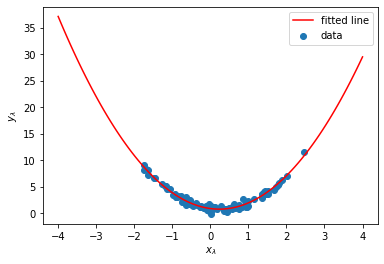

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel("$x_\lambda$")
ax.set_ylabel("$y_\lambda$")

ax.scatter(X, Y, label="data")

xs = t.linspace(-4, 4, 100)[:, None]
ax.plot(xs, quad(xs)@Wh, 'r', label="fitted line")
ax.legend();